In [139]:
import pandas as pd

In [140]:
df = pd.read_csv('/content/drive/MyDrive/Neural Network and Fuzzy System /Linear Regression/Salary_dataset.csv')

In [141]:
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [142]:
x = df.drop(['Unnamed: 0', 'Salary'], axis=1)
y = df['Salary']

In [143]:
x

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [144]:
y

,Salary
0,39344.0
1,46206.0
2,37732.0
3,43526.0
4,39892.0
5,56643.0
6,60151.0
7,54446.0
8,64446.0
9,57190.0


In [145]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [131]:
x_train

,YearsExperience
9,3.8
28,10.4
24,8.8
12,4.1
0,1.2
4,2.3
16,5.2
5,3.0
13,4.2
11,4.1


In [132]:
#from sklearn.linear_model import LinearRegression
#model = LinearRegression()

In [46]:
#model.fit(x_train, y_train)

LinearRegression()

In [47]:
'''y_hat = model.predict(x_test)
y_hat'''

array([[ 69059.16595701],
       [ 47692.57727288],
       [100644.55792486],
       [ 56982.3984399 ],
       [ 82064.91559083]])

In [50]:
'''from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_hat)
mse'''

26272919.643237103

In [146]:
df.isnull().sum()


,0
Unnamed: 0,0
YearsExperience,0
Salary,0


In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = pd.DataFrame(x_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [148]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [149]:
model.compile(optimizer='adam', loss='mse')

In [151]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, batch_size=16)


Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 2955974400.0000 - val_loss: 4485091328.0000
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 3117900544.0000 - val_loss: 4474382336.0000
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 3183377408.0000 - val_loss: 4463703040.0000
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 3338595584.0000 - val_loss: 4453096960.0000
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 3006710016.0000 - val_loss: 4442709504.0000
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 3183041536.0000 - val_loss: 4432206848.0000
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 3030063360.0000 - val_loss: 4421786624.0000
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 3001017344.0000 - val_loss: 4411306496.0000
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 2975197440.0000 - val_loss: 4400754176.0000
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 2908112128.0

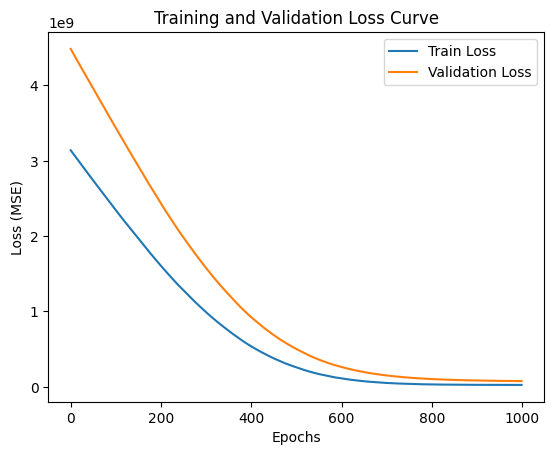

In [152]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss Curve')
plt.show()